In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = pd.read_table("iris.data", sep = ",", names = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Class"])

In [4]:
data.head() 

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Splitting values from the labes to avoid analysing the labes as well

In [6]:
X = data.iloc[:, :-1].values 

In [7]:
Y = data.iloc[:, 4].values 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)  

In [10]:
#Scaling the data to avoid influence from extreme data values

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
X_train = scaler.transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
#End of scaling

In [17]:
#Test for KNN accuracy
from sklearn.neighbors import KNeighborsClassifier

In [18]:
classifier = KNeighborsClassifier(n_neighbors=5)

In [19]:
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
Y_pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(Y_test,Y_pred)

0.9333333333333333

In [23]:
accuracy = []

In [26]:
for i in range(1, 50):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    accuracy.append(accuracy_score(Y_test,pred_i))
    print("K = ",i, " Accuracy = " ,accuracy[i])

K =  1  Accuracy =  0.8666666666666667
K =  2  Accuracy =  0.9111111111111111
K =  3  Accuracy =  0.9333333333333333
K =  4  Accuracy =  0.9333333333333333
K =  5  Accuracy =  0.9333333333333333
K =  6  Accuracy =  0.9777777777777777
K =  7  Accuracy =  0.9555555555555556
K =  8  Accuracy =  0.9555555555555556
K =  9  Accuracy =  0.9555555555555556
K =  10  Accuracy =  0.9333333333333333
K =  11  Accuracy =  0.9333333333333333
K =  12  Accuracy =  0.9333333333333333
K =  13  Accuracy =  0.9333333333333333
K =  14  Accuracy =  0.9333333333333333
K =  15  Accuracy =  0.9333333333333333
K =  16  Accuracy =  0.9111111111111111
K =  17  Accuracy =  0.9555555555555556
K =  18  Accuracy =  0.8888888888888888
K =  19  Accuracy =  0.9333333333333333
K =  20  Accuracy =  0.8888888888888888
K =  21  Accuracy =  0.8666666666666667
K =  22  Accuracy =  0.8444444444444444
K =  23  Accuracy =  0.8666666666666667
K =  24  Accuracy =  0.8444444444444444
K =  25  Accuracy =  0.8444444444444444
K =  26  

Text(0,0.5,'Accuracy')

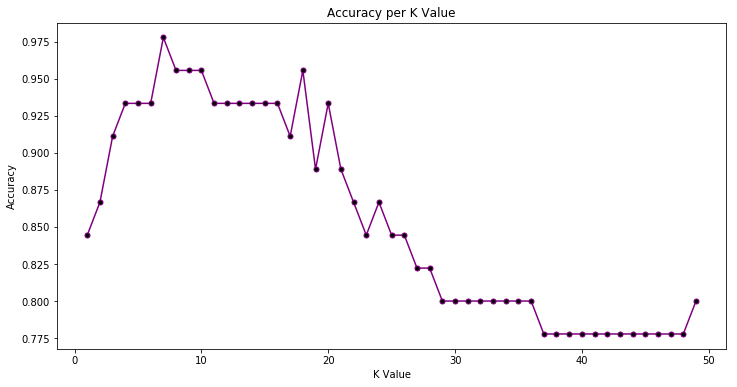

In [25]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), accuracy, color='purple', linestyle='solid', marker='o',  
         markerfacecolor='black', markersize=5)
plt.title('Accuracy per K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy')